In [1]:

!pip install -q xgboost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
df = sns.load_dataset("titanic")
print("Shape inicial:", df.shape)
df.head()

In [50]:
# Colunas selecionadas
df = df[["survived", "pclass", "sex", "sibsp", "parch", "embarked", "alone", "adult_male"]]

# Remover linhas com valores ausentes
df.dropna(inplace=True)

# One-hot encoding para variáveis categóricas
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)

# Separar X e y
X = df.drop("survived", axis=1)
y = df["survived"]

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


<ipython-input-50-00473853ff28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [51]:
# 3. Treinar os modelos

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.8116591928251121
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       141
           1       0.74      0.74      0.74        82

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223


KNN
Accuracy: 0.7937219730941704
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       141
           1       0.71      0.74      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.79      0.79       223


Decision Tree
Accuracy: 0.8116591928251121
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       141
           1       0.79      0.66      0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


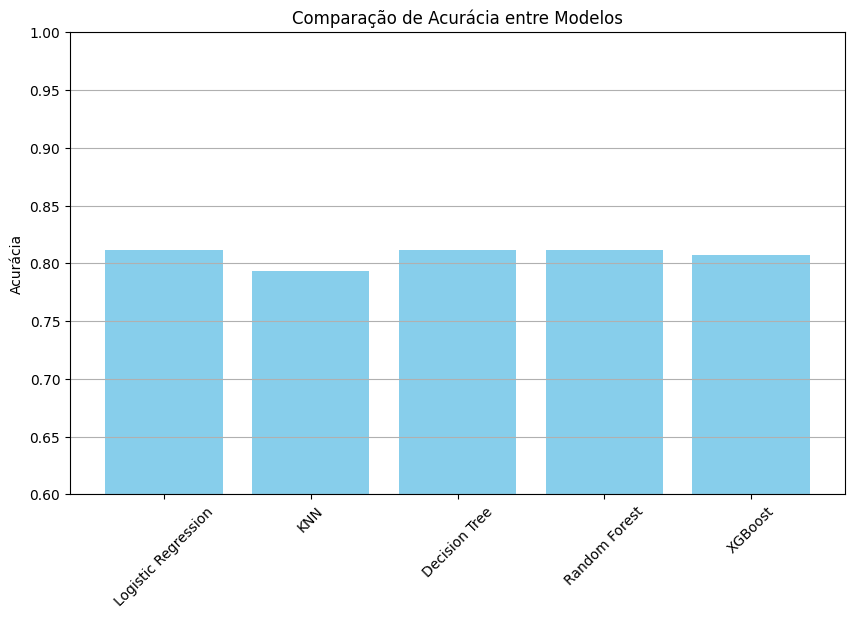

In [52]:
# 4. grafico com os resultados

plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.xticks(rotation=45)
plt.ylim(0.6, 1)
plt.grid(axis='y')
plt.show()



Logistic Regression
Accuracy: 0.7937
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       141
           1       0.70      0.78      0.74        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.80       223


KNN (k=5)
Accuracy: 0.7937
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       141
           1       0.71      0.74      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.79      0.79       223


Decision Tree
Accuracy: 0.8117
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       141
           1       0.79      0.66      0.72        82

    accuracy   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


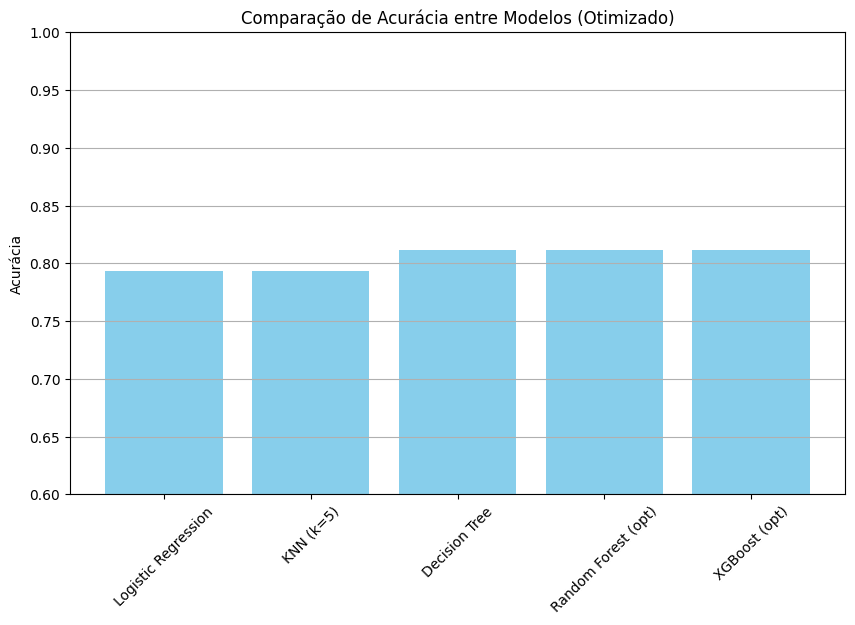

In [53]:
# 1. Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# 2. Carregamento e pré-processamento
df = sns.load_dataset("titanic")

# Selecionar colunas úteis
df = df[["survived", "pclass", "sex", "sibsp", "parch", "embarked", "alone", "adult_male"]]

# Remover linhas com valores ausentes
df.dropna(inplace=True)

# One-hot encoding para variáveis categóricas
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)

# Separar X e y
X = df.drop("survived", axis=1)
y = df["survived"]

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 3. Modelos básicos com ajustes
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# 4. Otimização de Random Forest
rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions={
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
    },
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
models["Random Forest (opt)"] = rf

# 5. Otimização de XGBoost
xgb_model = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions={
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
    },
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
models["XGBoost (opt)"] = xgb_model

# 6. Avaliação
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# 7. Visualização
plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Comparação de Acurácia entre Modelos (Otimizado)")
plt.ylabel("Acurácia")
plt.xticks(rotation=45)
plt.ylim(0.6, 1)
plt.grid(axis='y')
plt.show()
